# Oefenlabo Quantum Computing

Zorg dat je systeem goed werkt:
Lees de readme van deze repo om Qiskit te installeren voor Python. De code vergt minimale kennis van Python zelf.

## Qubits initialiseren
Creëer een circuit met een quantum qubit en een klassieke qubit. Koppel deze aan elkaar , meet, en kijk naar de uitkomst. Herhaal voor een setup met 2 qubits en met 3 of 4 qubits.

In [4]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Perform a measurement on the qubit
qc.measure_all()

# Visualize the circuit
print(qc)
qc.draw('mpl')

# Use the Aer simulator to simulate the measurement
simulator = Aer.get_backend('qasm_simulator')
transpiled_program = transpile(qc, simulator)
job = simulator.run(transpiled_program, shots=1000)
counts = job.result().get_counts()

print("Measurement result:", counts)

         ░ ┌─┐
     q: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0 
Measurement result: {'0': 1000}


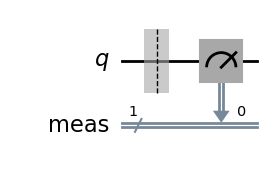

In [5]:
qc.draw('mpl')

## Quantum Gates

Quantum gates worden gebruikt om qubits te manipuleren, zonder ernaar te kijken. Je kan het vergelijken met de AND/OR/NOT gates in klassieke elektronica. Je kan dus een aantal qubits aan een gate meegeven, en dan komt er (1 of meerdere) qubits uit. Vooral de Hadamard gate en de CNOT gate zijn cruciaal in verdere algoritmes. Hieronder de werking van enkele veelgebruikte gates (zie ook slides theorie):

De volgende gates werken op 1 qubit.
- Hadamard gate: $\ket{0}$, $\ket{1}$ omzetten in superpositie $\ket{+} := \frac{\ket{0} + \ket{1}}{\sqrt{2}}$, resp $\ket{-} := \frac{\ket{0} - \ket{1}}{\sqrt{2}}$ (en terug, indien twee keer toegepast)
- X: NOT gate op $\ket{0}$ en $\ket{1}$, dus deze omwisselen
- Y: $\ket{0}$ naar $i \ket{1}$, $\ket{1}$ naar $-i  \ket{0}$ --- hierbij is $i$ is de complexe $i$, dus $i^2 = -1$
- Z: phase shift: $\ket{0}$ naar $\ket{0}$, $\ket{1}$ naar $-\ket{1}$
- S: shift: $\ket{0}$ naar $\ket{0}$, $\ket{1}$ naar $\frac{1 + i}{\sqrt{2}}\ket{1}$
- T: shift: $\ket{0}$ naar $\ket{0}$, $\ket{1}$ naar $i \ket{1}$

De volgende gates werken op 2 qubits
- CNOT = CX: controlled NOT gate: de tweede qubit wordt geswitched zoals X, maar enkel als de eerste qubit 1 is
- CZ = controlled Z gate: de tweede qubit wordt door Z gate gestuurd als eerste qubit 1 is
- SWAP: wissel de qubits van volgorde
- TOFFOLI = CCNOT: de derde qubit wordt geswitched zoals X maar enkel als de eerste twee qubits 1 zijn.

### Oefening:
Volg op Qiskit de tutorial 'Circuit Basics' (https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html). Sommige stukken zijn nogal gedetailleerd en behandel ik niet, zoals de qsphere. Wat wel zeker tot de leerstof behoort is op het opzetten van de volledig entangled state (zie verdere oefeningen). Voor 3 qubits heet dit de GHZ-state, genoemd naar Greenberger-Horne-Zeilinger. Voor 2 qubits heten deze states (er zijn er verschillende) de Bell states of ook wel EPR-pairs, genoemd naar Einstein-Podolsky-Rosen.

In [6]:
import numpy as np
from qiskit import QuantumCircuit

## Quantum Superposition

Creëer een superpostie van 2 qubits.

In [7]:
#code
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# 000

# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
#~00

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
#~~0


# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

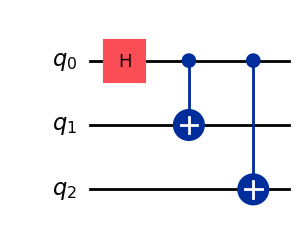

In [8]:
circ.draw('mpl')

In [9]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')



<IPython.core.display.Latex object>

In [10]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)



<IPython.core.display.Latex object>

In [11]:
state.draw('qsphere')

MissingOptionalLibraryError: "The 'seaborn' library is required to use 'plot_state_qsphere'. You can install it with 'pip install seaborn'."

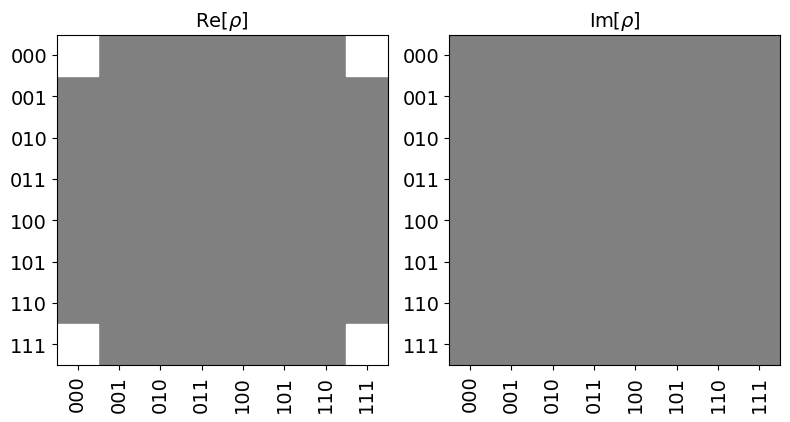

In [12]:
state.draw('hinton')



In [13]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data



array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

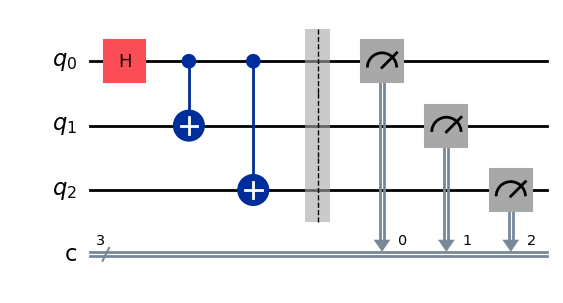

In [14]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [15]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [16]:
counts = result_sim.get_counts(qc_compiled)
print(counts)



{'111': 545, '000': 479}


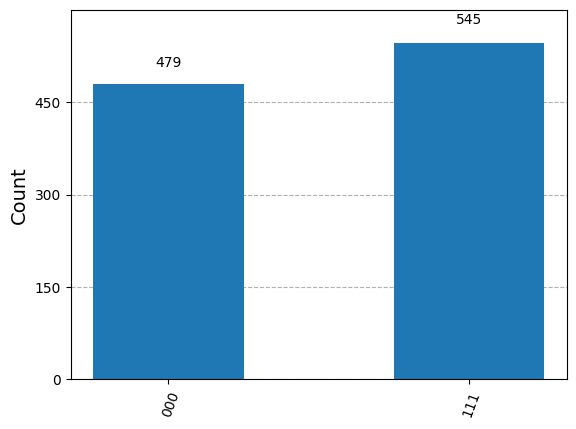

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)



## Quantum Entanglement

Qubits kunnen door een slimme combinatie van poorten in een bepaalde superpositie worden gebracht waarbij ze maximale informatiedeling hebben. dat wil zeggen dat als 1 qubit wordt gemeten en dus een vaste meetwaarde heeft, de meetwaarde van de andere qubit ook gekend is **zonder te moeten meten**. Deze eigenschap is bijna een soort van magie: de entangled (Nederlands: verstrengelde) qubits zijn niet fysiek met elkaar verbonden. Albert Einstein zelf noemde het 'spooky action at a distance'. In Nederland, aan het QuTech lab van de TUDelft (https://www.tudelft.nl/en/2021/tu-delft/dutch-researchers-establish-the-first-entanglement-based-quantum-network), is men erin geslaagd om over een afstand van meer dan 30 meter zo informatie uit te wisselen. Het is belangrijk te beseffen dat dit gebeurt zonder internet, wifi of dergelijke: énkel door de eigenschappen van qubits.

Voor 2 qubits zijn er 4 states met maximale entanglement; dit zijn de Bell states (ze worden ook wel EPR-pairs genoemd, naar Einstein-Podolsky-Rosen):
- $$\ket{\Phi^{+}} = \frac{\ket{00} + \ket{11}}{\sqrt{2}} $$
- $$\ket{\Phi^{-}} = \frac{\ket{00} - \ket{11}}{\sqrt{2}} $$
- $$\ket{\Psi^{+}} = \frac{\ket{01} + \ket{10}}{\sqrt{2}} $$
- $$\ket{\Psi^{-}} = \frac{\ket{01} - \ket{11}}{\sqrt{2}} $$

Oefening

Creëer verschillende Bell States, met behulp van de Hadamard, CNOT en andere gates. Meet verschillende keren de waarde van deze states en observeer het resultaat. Je mag hier opzoeken (https://en.wikipedia.org/wiki/Bell_state) en/of chatGPT gebruiken ter assistentie.


Total count for 00 and 11 are: {'00': 480, '11': 520}


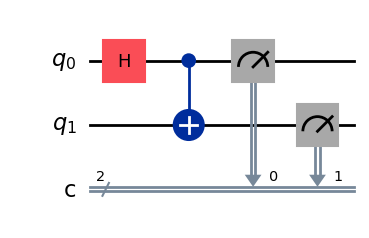

In [18]:
#code
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

In [21]:
#ChatGPT oplossing:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Create a quantum circuit with 2 qubits
bell_phi_plus = QuantumCircuit(2)

# Apply Hadamard gate on the first qubit
bell_phi_plus.h(0)

# Apply a CNOT gate with the first qubit as the control and the second qubit as the target
bell_phi_plus.cx(0, 1)

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
job = simulator.run(bell_phi_plus)
result = job.result()

# Print the statevector
statevector = result.get_statevector()
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [22]:
statevector.draw('latex')

<IPython.core.display.Latex object>

In [23]:
# Create a new quantum circuit for |Φ⁻⟩
bell_phi_minus = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
bell_phi_minus.h(0)

# Apply a CNOT gate with the first qubit as control and the second qubit as target
bell_phi_minus.cx(0, 1)

# Apply a Pauli-X gate to both qubits
bell_phi_minus.x(0)
bell_phi_minus.x(1)

# Simulate and print the statevector
job = simulator.run(bell_phi_plus)
result = job.result()

statevector = result.get_statevector()
print(statevector)
statevector.draw('latex')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [24]:
# Create a new quantum circuit for |Ψ⁺⟩
bell_psi_plus = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
bell_psi_plus.h(0)

# Apply an X gate to the second qubit
bell_psi_plus.x(1)

# Apply a CNOT gate with the first qubit as control and the second qubit as target
bell_psi_plus.cx(0, 1)

# Simulate and print the statevector
job = simulator.run(bell_phi_plus)
result = job.result()

statevector = result.get_statevector()
print(statevector)
statevector.draw('latex')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [25]:
# Create a new quantum circuit for |Ψ⁻⟩
bell_psi_minus = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
bell_psi_minus.h(0)

# Apply an X gate to the second qubit
bell_psi_minus.x(1)

# Apply a CNOT gate with the first qubit as control and the second qubit as target
bell_psi_minus.cx(0, 1)

# Apply a Pauli-X gate to both qubits
bell_psi_minus.x(0)
bell_psi_minus.x(1)

# Simulate and print the statevector
job = simulator.run(bell_phi_plus)
result = job.result()

statevector = result.get_statevector()
print(statevector)
statevector.draw('latex')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

# Teleportation

Een ander voorbeeld van het gebruik van entangled qubits (ter illustratie)

Measurement results: {'101': 263, '100': 237, '110': 246, '111': 278}


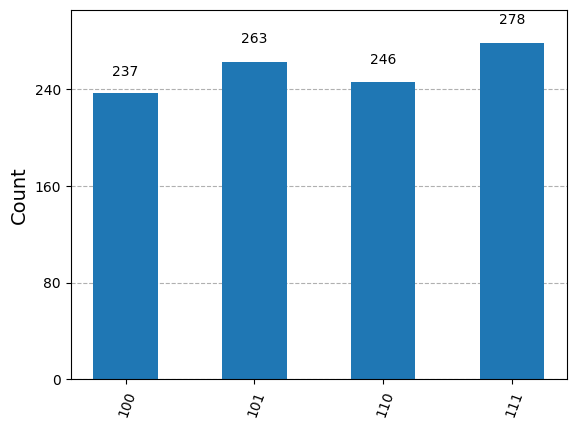

In [27]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits (Alice's qubit, the entangled pair, and Bob's qubit)
teleportation_circuit = QuantumCircuit(3, 3)

# Step 1: Prepare the entangled Bell pair |Φ⁺⟩ (00 + 11) / √2
teleportation_circuit.h(1)  # Apply Hadamard gate to create entanglement
teleportation_circuit.cx(1, 2)  # Apply CNOT gate

# Step 2: Alice prepares her qubit |ψ⟩ to be teleported
teleportation_circuit.x(0)  # Apply a Pauli-X gate (bit flip) for demonstration

# Step 3: Bell measurement by Alice (CX and H gates)
teleportation_circuit.cx(0, 1)
teleportation_circuit.h(0)

# Step 4: Measurement by Alice
teleportation_circuit.measure(0, 0)
teleportation_circuit.measure(1, 1)

# Step 5: Alice sends the measurement results to Bob

# Step 6: Bob performs conditional operations based on Alice's measurements
teleportation_circuit.barrier()  # Add a barrier for clarity

teleportation_circuit.z(2).c_if(0, 1)  # Conditional Z gate
teleportation_circuit.x(2).c_if(1, 1)  # Conditional X gate

# Step 7: Measurement by Bob
teleportation_circuit.measure(2, 2)

# Simulate the circuit and print results
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(teleportation_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print("Measurement results:", counts)

# Visualize the circuit and results
teleportation_circuit.draw(output='mpl')
plot_histogram(counts)

## Superdense Coding

In [28]:
import qiskit
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
#from qiskit import IBMQ
from configparser import RawConfigParser

type = 'real' # keuze om uit te voeren op een 'echte' quantum computer of een simulator
type = 'sim'

def run(program, type, shots = 1024):
  if type == 'real':
    if not run.isInit:
        # Setup the API key for the real quantum computer.
        parser = RawConfigParser()
        parser.read('config.ini')
        IBMQ.enable_account(parser.get('IBM', 'key'))
        run.isInit = True

    # Set backend server
    backend = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))

    # Uitvoeren op een quantum computer
    print("Running on", backend.name())
    job = qiskit.execute(program, backend)
    return job.result().get_counts()
  else:
    # Uitvoeren op een simulator
    print("Running on the simulator.")
    simulator = Aer.get_backend('qasm_simulator')
    transpiled_program = transpile(program, simulator)
    job = simulator.run(transpiled_program, shots=shots)
    return job.result().get_counts()

run.isInit = False

In [ ]:


# Voorbeeld 3: Superdense coding: stuur two classical bits van informatie  (01) terwijl we maar 1 qubit manipuleren: 

# Dit gaat door een Bell state ongedaan te maken: Entangle 2 qubits, met de eerste in superpositie, 
# Maak dan de stappen achteruit ongedaan. 
# De eerste qubit is van Alice, de zender.
# De tweede qubit is van Bob, de ontvanger.
# Alice past haar qubit qr[0] aan om uiteindelijk 01 aan te geven aan Bob.
# Bob zal de qubit van Alice 'reverse' entangelen en uit superpositie halen en de resultaten meten, 
# en Bob zal dan  01 krijgen uit de qubits (zijn qubit zal in 1 wijzigen).

# Setup qubits.
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
program = QuantumCircuit(qr, cr);

# Zender: Eerste qubit in superpositie brengen.
program.h(qr[0]) # Gebruik de Hadamard Gate

# Zender: Entangle de qubits met een  controlled NOT operator. Als de eerste qubit 1 is, wordt de tweede qubit geïnverteerd. 
program.cx(qr[0], qr[1])
#~~
# Verzender: Inverteer de eerste qubit om deze  van 0 naar 1 te zetten (remember, we willen 01 voorstellen met slechts manipulatie van de eertse qubit q[0]).
# 00  I  - identiteit, niets doen
# 01  Z  - program.z(qr[0])
# 10  X  - program.x(qr[0])
# 11  XZ - program.x(qr[0]) program.z(qr[0])
#program.x(qr[0])
program.z(qr[0]) #Z is the phase operator
#program.x(qr[0]) #X is the invert operator, oftewel the not gate

# Ontvanger: Herhaal de controlled NOT operator, om de entanglement ongedaan te maken.
program.cx(qr[0], qr[1])

# Ontvanger: Herhaal de Hadamard, om de superposition state ongedaan te maken.
program.h(qr[0])

# Ontvanger: meet de waarde van de qubits, nu kunnen we de originele waardes terugkrijgen.
program.measure(qr, cr);

# Execute the program.
print(run(program, type))

: 